# Анализ системы метрик приложения

- Автор: Логинов Павел Александрович
- Дата: 17.07.2025

## Введение

Приложение Procrastinate Pro+: предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный. С его помощью менеджеры стремятся расширить аудиторию, добавив в неё пользователей, которые увлекаются спортом и здоровым образом жизни.

К запуску нового контента была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать. Нужно разобраться, почему это происходит.

### Задачи:
- провести анализ юнит-экономики продукта в динамике за первые 28 дней;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.


### Данные

Есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


## Загрузка и предобработка данных

Начнём с загрузки библиотек `pandas` (для работы со структурированными табличными данными), `matplotlib.pyplot` (для визуализации данных), `numpy` (для работы с массивами и выполнения математических операций), `seaborn` (для создания статистических графиков), `matplotlib.colors` (для работы с цветами) и датасетов `ppro_visits.csv`, `ppro_orders.csv`, `ppro_costs.csv`

In [1]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
# Выгружаем данные в переменные

try:
    visits = pd.read_csv('C:/Users/Student/Desktop/ppro_visits.csv')
    orders = pd.read_csv('C:/Users/Student/Desktop/ppro_orders.csv')
    costs = pd.read_csv('C:/Users/Student/Desktop/ppro_costs.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_visits.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_orders.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_costs.csv')

Познакомимся с данными датасета `ppro_visits.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран

visits.head()

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


In [4]:
# Выводим информацию о датафрейме

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        161865 non-null  int64 
 1   region         161865 non-null  object
 2   device         161865 non-null  object
 3   channel        161865 non-null  object
 4   session_start  161865 non-null  object
 5   session_end    161865 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.4+ MB


Датафрейм `visits` содержит 6 столбца и 161864 строки, в котором представлена информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года.

Пропуски в датафрейме - отсутствуют

Тип данных в столбцах `user_id`, `region`, `device`, `channel` - соответствует характеру данных. Однако тип данных в столбцах `session_start` и `session_end` необходимо преобразовать в формат даты и времени `datetime64` и округлить до даты без времени

In [5]:
# Меняем тип данных и выводим информацию о датафрейме

visits['session_start'] = pd.to_datetime(visits['session_start']).dt.date
visits['session_end'] = pd.to_datetime(visits['session_end']).dt.date

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        161865 non-null  int64 
 1   region         161865 non-null  object
 2   device         161865 non-null  object
 3   channel        161865 non-null  object
 4   session_start  161865 non-null  object
 5   session_end    161865 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.4+ MB


Далее познакомимся с данными датасета `ppro_orders.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [6]:
# Выводим первые строки датафрейма на экран

orders.head()

,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


In [7]:
# Выводим информацию о датафрейме

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   33893 non-null  int64  
 1   event_dt  33893 non-null  object 
 2   revenue   33893 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 794.5+ KB


Датафрейм `orders` содержит 3 столбца и 33892 строки, в котором представлена информация о покупках

Пропуски в датафрейме - отсутствуют

Тип данных в столбцах `user_id` и `revenue`- соответствует характеру данных. Однако тип данных в столбцах `event_dt` необходимо преобразовать в формат даты и времени `datetime64` и округлить до даты без времени

In [8]:
# Меняем тип данных и выводим информацию о датафрейме

orders['event_dt'] = pd.to_datetime(orders['event_dt']).dt.date

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   33893 non-null  int64  
 1   event_dt  33893 non-null  object 
 2   revenue   33893 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 794.5+ KB


Познакомимся с данными датасета `ppro_costs.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [9]:
# Выводим первые строки датафрейма на экран

costs.head()

,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


In [10]:
# Выводим информацию о датафрейме

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       976 non-null    object 
 1   channel  976 non-null    object 
 2   costs    976 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB


Датафрейм `orders` содержит 3 столбца и 976 строк, в котором представлена информация о затратах на маркетинг

Пропуски в датафрейме - отсутствуют

Тип данных в столбцах `channel` и `costs`- соответствует характеру данных. Однако тип данных в столбцах `dt` необходимо преобразовать в формат даты и времени `datetime64` и округлить до даты без времени

In [11]:
# Меняем тип данных и выводим информацию о датафрейме

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       976 non-null    object 
 1   channel  976 non-null    object 
 2   costs    976 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB


Проверим все датафреймы на наличие дубликатов

In [12]:
# Проверяем данные на наличие дубликатов

duplicates_visits = visits.duplicated().sum()
duplicates_orders = orders.duplicated().sum()
duplicates_costs = costs.duplicated().sum()

print(duplicates_visits)
print(duplicates_orders)
print(duplicates_costs)

0
0
0


Дубликаты - отсутствуют

Проверим значения столбцов категориальных данных во всех датафреймах

In [13]:
# Проверяем значения столбцов категориальных данных во всех датафреймах

name_region =  visits['region'].unique()
name_device = visits['device'].unique()
name_channel = visits['channel'].unique()

name_channel_1 = costs['channel'].unique()

print(name_region)
print(name_device)
print(name_channel)
print(name_channel_1)

['India']
['desktop' 'tv' 'mobile']
['MediaTornado' 'RocketSuperAds' 'FaceBoom' 'TipTop']
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop']


Все значения - корректны и не повторяются из-за различных стилей написания

Таким образом, датафреймы подготовлены к дальнейшему анализу:

- Пропуски - отсутствуют
- Дубликаты - отсутствуют
- Значения категориальных данных
- Столбцы, которые содержат информацию о дате и времени, приведены к корректному типу данных `datetime64`
- Тип данных имеющихся столбцов соответствуют характеру данных

Теперь можно приступать к следующим шагам анализа данных

## Подготовка данных к когортному анализу

Для подготовки данных к когортному анализу создадим новый датафрейм `profiles`, который позволит изучит окупаемость привлечения пользователей за первые 28 дней. Для этого выделим следующие данные для каждого пользователя:

- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).

Начнём с даты первой сессии и канала привлечения. Для их нахождения создадим группировку под названием `first_dt_channel`

In [14]:
# Создаём новую таблицу

first_dt_channel = visits.sort_values(by='session_start').groupby('user_id').agg(
    first_dt=('session_start', 'first'),
    first_channel=('channel', 'first')
).reset_index()

first_dt_channel

,user_id,first_dt,first_channel
0,26034876,2024-05-29,FaceBoom
1,69890364,2024-06-28,RocketSuperAds
2,75610104,2024-06-09,FaceBoom
3,76692397,2024-10-21,FaceBoom
4,80224421,2024-06-21,FaceBoom
...,...,...,...
74851,999956504962,2024-07-04,MediaTornado
74852,999959994517,2024-06-03,RocketSuperAds
74853,999962248443,2024-10-27,RocketSuperAds
74854,999970372492,2024-08-07,TipTop


Затем рассчитаем стоимость привлечения пользователя `cac`. Для этого на основе таблицы `first_dt_channel` определим количество привлечённых пользователей за каждый день в каждом рекламном источнике

In [15]:
# Определяем количество привлечённых пользователей

users = first_dt_channel.groupby(['first_dt', 'first_channel'])['user_id'].nunique().reset_index(name='users_count')
users

,first_dt,first_channel,users_count
0,2024-04-01,FaceBoom,133
1,2024-04-01,MediaTornado,80
2,2024-04-01,RocketSuperAds,70
3,2024-04-01,TipTop,73
4,2024-04-02,FaceBoom,94
...,...,...,...
971,2024-11-29,TipTop,93
972,2024-11-30,FaceBoom,120
973,2024-11-30,MediaTornado,56
974,2024-11-30,RocketSuperAds,55


Далее объединяем таблицу `costs` и `users` для вычисления стоимости привлечения пользователя `cac`

In [16]:
# Создаём новую таблицу и вычисляем cac

channel_costs = pd.merge(costs, users, left_on=['dt', 'channel'], right_on=['first_dt', 'first_channel'], how='left')
channel_costs['cac'] = channel_costs['costs']/channel_costs['users_count']
channel_costs

,dt,channel,costs,first_dt,first_channel,users_count,cac
0,2024-04-01,FaceBoom,124.938874,2024-04-01,FaceBoom,133,0.939390
1,2024-04-02,FaceBoom,88.147779,2024-04-02,FaceBoom,94,0.937742
2,2024-04-03,FaceBoom,120.779457,2024-04-03,FaceBoom,133,0.908116
3,2024-04-04,FaceBoom,98.981253,2024-04-04,FaceBoom,105,0.942679
4,2024-04-05,FaceBoom,109.044760,2024-04-05,FaceBoom,110,0.991316
...,...,...,...,...,...,...,...
971,2024-11-26,TipTop,216.741490,2024-11-26,TipTop,76,2.851862
972,2024-11-27,TipTop,263.071019,2024-11-27,TipTop,93,2.828721
973,2024-11-28,TipTop,252.638555,2024-11-28,TipTop,87,2.903891
974,2024-11-29,TipTop,261.943208,2024-11-29,TipTop,93,2.816594


Теперь объединим эту таблицу с `first_dt_channel`, чтобы получить информацию о cтоимости привлечения каждого пользователя

In [17]:
profiles = pd.merge(first_dt_channel,
    channel_costs[['first_dt', 'first_channel', 'cac']],
    on=['first_dt', 'first_channel'],
    how='left'
)
profiles

,user_id,first_dt,first_channel,cac
0,26034876,2024-05-29,FaceBoom,0.953250
1,69890364,2024-06-28,RocketSuperAds,0.604917
2,75610104,2024-06-09,FaceBoom,1.196159
3,76692397,2024-10-21,FaceBoom,1.147967
4,80224421,2024-06-21,FaceBoom,1.208981
...,...,...,...,...
74851,999956504962,2024-07-04,MediaTornado,0.267129
74852,999959994517,2024-06-03,RocketSuperAds,0.829762
74853,999962248443,2024-10-27,RocketSuperAds,0.411066
74854,999970372492,2024-08-07,TipTop,2.103363


Таким образом, мы получили таблицу `profiles`, которая содержит в себе информацию о стоимости привлечения одного пользователя (столбец `cac`). 

Далее добавим к данным с событиями информацию о первом источнике привлечения и дату привлечения пользователя из созданной таблицы

In [18]:
# Объединяем данные

visits_full = pd.merge(visits, profiles, on='user_id', how='left')
visits_full

,user_id,region,device,channel,session_start,session_end,first_dt,first_channel,cac
0,631105188566,India,desktop,MediaTornado,2024-04-01,2024-04-01,2024-04-01,MediaTornado,0.249160
1,892885906464,India,tv,RocketSuperAds,2024-04-01,2024-04-01,2024-04-01,RocketSuperAds,0.886429
2,517003690029,India,mobile,MediaTornado,2024-04-01,2024-04-01,2024-04-01,MediaTornado,0.249160
3,185156659289,India,mobile,MediaTornado,2024-04-01,2024-04-01,2024-04-01,MediaTornado,0.249160
4,409503040345,India,mobile,RocketSuperAds,2024-04-01,2024-04-01,2024-04-01,RocketSuperAds,0.886429
...,...,...,...,...,...,...,...,...,...
161860,173722594460,India,desktop,MediaTornado,2024-11-30,2024-11-30,2024-11-30,MediaTornado,0.271968
161861,711873273862,India,mobile,FaceBoom,2024-11-30,2024-11-30,2024-11-30,FaceBoom,1.177762
161862,797604836232,India,mobile,TipTop,2024-11-30,2024-11-30,2024-11-30,TipTop,2.864337
161863,188139897674,India,desktop,MediaTornado,2024-11-30,2024-11-30,2024-11-30,MediaTornado,0.271968


Затем рассчитаем дневной лайфтайм для каждого посещения

In [19]:
# Рассчитываем дневной лайфтайм

visits_full['lifetime'] = (visits_full['session_start'] - visits_full['first_dt']).dt.days
visits_full

,user_id,region,device,channel,session_start,session_end,first_dt,first_channel,cac,lifetime
0,631105188566,India,desktop,MediaTornado,2024-04-01,2024-04-01,2024-04-01,MediaTornado,0.249160,0
1,892885906464,India,tv,RocketSuperAds,2024-04-01,2024-04-01,2024-04-01,RocketSuperAds,0.886429,0
2,517003690029,India,mobile,MediaTornado,2024-04-01,2024-04-01,2024-04-01,MediaTornado,0.249160,0
3,185156659289,India,mobile,MediaTornado,2024-04-01,2024-04-01,2024-04-01,MediaTornado,0.249160,0
4,409503040345,India,mobile,RocketSuperAds,2024-04-01,2024-04-01,2024-04-01,RocketSuperAds,0.886429,0
...,...,...,...,...,...,...,...,...,...,...
161860,173722594460,India,desktop,MediaTornado,2024-11-30,2024-11-30,2024-11-30,MediaTornado,0.271968,0
161861,711873273862,India,mobile,FaceBoom,2024-11-30,2024-11-30,2024-11-30,FaceBoom,1.177762,0
161862,797604836232,India,mobile,TipTop,2024-11-30,2024-11-30,2024-11-30,TipTop,2.864337,0
161863,188139897674,India,desktop,MediaTornado,2024-11-30,2024-11-30,2024-11-30,MediaTornado,0.271968,0


Аналогичным образом добавим к данным с покупками информацию о первом источнике привлечения и дату привлечения пользователя из созданной таблицы

In [20]:
# Объединяем данные

orders_full = pd.merge(orders, profiles, on='user_id', how='left')
orders_full

,user_id,event_dt,revenue,first_dt,first_channel,cac
0,771951256319,2024-04-01,2.99,2024-04-01,FaceBoom,0.939390
1,829942381059,2024-04-01,2.99,2024-04-01,FaceBoom,0.939390
2,727879856738,2024-04-01,14.99,2024-04-01,FaceBoom,0.939390
3,481270888930,2024-04-01,2.99,2024-04-01,TipTop,0.742467
4,844695029762,2024-04-01,2.99,2024-04-01,FaceBoom,0.939390
...,...,...,...,...,...,...
33888,397577560536,2024-11-30,2.99,2024-11-30,RocketSuperAds,0.394091
33889,610390409217,2024-11-30,7.99,2024-11-30,TipTop,2.864337
33890,74116424793,2024-11-30,2.99,2024-11-30,FaceBoom,1.177762
33891,691138256176,2024-11-30,2.99,2024-11-30,FaceBoom,1.177762


Затем рассчитаем дневной лайфтайм для каждого события

In [21]:
# Рассчитываем дневной лайфтайм

orders_full['lifetime'] = (orders_full['event_dt'] - orders_full['first_dt']).dt.days
orders_full

,user_id,event_dt,revenue,first_dt,first_channel,cac,lifetime
0,771951256319,2024-04-01,2.99,2024-04-01,FaceBoom,0.939390,0
1,829942381059,2024-04-01,2.99,2024-04-01,FaceBoom,0.939390,0
2,727879856738,2024-04-01,14.99,2024-04-01,FaceBoom,0.939390,0
3,481270888930,2024-04-01,2.99,2024-04-01,TipTop,0.742467,0
4,844695029762,2024-04-01,2.99,2024-04-01,FaceBoom,0.939390,0
...,...,...,...,...,...,...,...
33888,397577560536,2024-11-30,2.99,2024-11-30,RocketSuperAds,0.394091,0
33889,610390409217,2024-11-30,7.99,2024-11-30,TipTop,2.864337,0
33890,74116424793,2024-11-30,2.99,2024-11-30,FaceBoom,1.177762,0
33891,691138256176,2024-11-30,2.99,2024-11-30,FaceBoom,1.177762,0


Таким образом, мы получаем две новые таблицы - `visits_full` и `orders_full`:

- Таблица `visits_full` включается в себя столбцы из первоначальной таблицы `visits` + информация о первой дате посещения, первом канале привлечения, стоимости привлечения пользователя и его дневном лайфтайме

- Таблица `orders_full` включается в себя столбцы из первоначальной таблицы `orders` + информация о первой дате посещения, первом канале привлечения, стоимости привлечения пользователя и его дневном лайфтайме

## Анализ месячной динамики основных метрик продукта

Для выполнения задачи 1 рассчитаем значения `DAU` (количество активных пользователей в день), `MAU` (количество активных пользователей в месяц) и `Stickiness` (долю от месячной аудитории, которую составляет в среднем дневная аудитория), а также визуализируем их. Начнём с показателя `DAU`

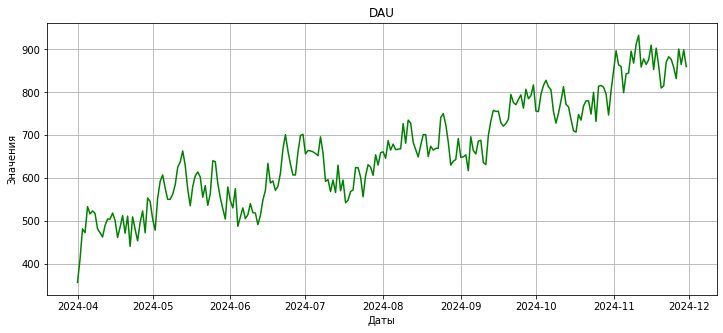

,session_start,user_id
0,2024-04-01,356
1,2024-04-02,410
2,2024-04-03,481
3,2024-04-04,472
4,2024-04-05,533
...,...,...
239,2024-11-26,832
240,2024-11-27,901
241,2024-11-28,865
242,2024-11-29,899


In [22]:
# Рассчитываем и визуализируем DAU

dau = visits_full.groupby('session_start')['user_id'].nunique().reset_index()

# Строим график в matplotlib

plt.subplots(figsize=(12,5))
plt.plot(dau['session_start'], dau['user_id'], color='green')
plt.title('DAU')
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.grid()
plt.show()

dau

На основе полученного графика мы наблюдаем тренд на увеличение количества активных пользователей в день с апреля 2024 по декабрь 2024 (c 350 пользователей до 900 пользователей). Далее рассмотрим показатель `MAU`

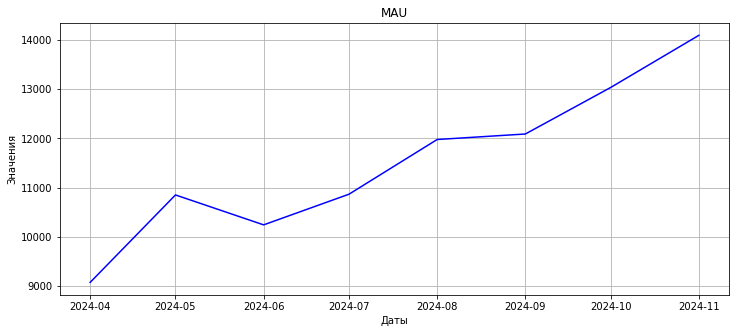

,month,user_id
0,2024-04-01,9069
1,2024-05-01,10849
2,2024-06-01,10240
3,2024-07-01,10864
4,2024-08-01,11977
5,2024-09-01,12089
6,2024-10-01,13036
7,2024-11-01,14097


In [23]:
# Рассчитываем и визуализируем MAU

visits_full['session_start'] = pd.to_datetime(visits_full['session_start'])
visits_full['month'] = visits_full['session_start'].dt.to_period('M').dt.to_timestamp()
mau = visits_full.groupby('month')['user_id'].nunique().reset_index()

# Строим график в matplotlib

plt.subplots(figsize=(12,5))
plt.plot(mau['month'], mau['user_id'], color='blue')
plt.title('MAU')
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.grid()
plt.show()

mau

На основе полученного графика мы наблюдаем тренд на увеличение количества активных пользователей в месяц с апреля 2024 по декабрь 2024 (c 9 тысяч пользователей до 14 тысяч пользователей). Далее рассмотрим показатель `Stickiness`

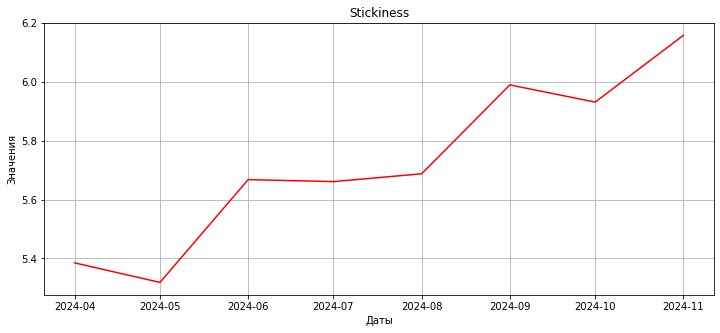

,month,user_id_x,user_id_y,stick
0,2024-04-01,9069,488.333333,5.384644
1,2024-05-01,10849,576.967742,5.318165
2,2024-06-01,10240,580.366667,5.667643
3,2024-07-01,10864,615.000000,5.660898
4,2024-08-01,11977,681.193548,5.687514
5,2024-09-01,12089,724.100000,5.989743
6,2024-10-01,13036,773.193548,5.931218
7,2024-11-01,14097,868.133333,6.158284


In [24]:
# Рассчитываем и визуализируем Stickiness

dau['session_start'] = pd.to_datetime(dau['session_start'])
dau['month'] = dau['session_start'].dt.to_period('M').dt.to_timestamp()
dau_monthly_average = dau.groupby('month')['user_id'].mean().reset_index()

stickiness_table = pd.merge(mau, dau_monthly_average, on = 'month')
stickiness_table['stick'] = (stickiness_table['user_id_y']/stickiness_table['user_id_x'])*100.0

# Строим график в matplotlib

plt.subplots(figsize=(12,5))
plt.plot(stickiness_table['month'], stickiness_table['stick'], color='red')
plt.title('Stickiness')
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.grid()
plt.show()

stickiness_table

На основе полученного графика мы наблюдаем тренд на увеличение доли месячной аудитории, которая активно пользуется продуктом ежедневно, с апреля 2024 по декабрь 2024 (c 5,3% до 6.2%). Таким образом, задача 1 - выполнена. Перейдём к выполнению задачи 2

Для выполнения задачи 2 необходимо в разрезе каждого месяца привлечения новых пользователей рассчитать:

- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Насчём с расчёта средней стоимости привлечения пользователя `CAC`. Исключим ноябрь 2024 из вычислений, поскольку данные заканчиваются ноябрем, то есть не все пользователи в этот месяц будут иметь полный набор данных за 28 дней (например, если пользователь был привлечен 15 ноября, то 28й день будет уже в декабре). Поэтому при подобном анализе следует оставить только тех пользователей, которые имели возможность совершать действия 28 дней. Но поскольку у нас анализ идет по месячным когортам, то логично будет вообще исключить пользователей, привлеченных в ноябре, так как это неполный месяц

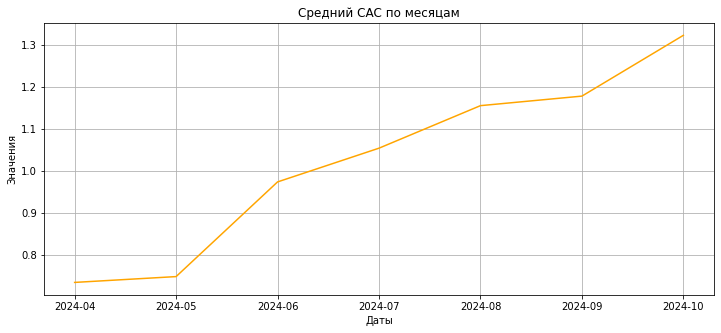

,month,cac,user_id,mean_cac
0,2024-04,6663.052333,9069,0.734706
1,2024-05,7327.775412,9789,0.748572
2,2024-06,8492.116887,8719,0.973978
3,2024-07,9217.078561,8742,1.054344
4,2024-08,10999.013650,9518,1.155601
5,2024-09,10838.014747,9198,1.178301
6,2024-10,12595.403113,9520,1.323047


In [25]:
# Подгатавливаем данные к вычислению среднего CAC по месяцам

profiles['first_dt'] = pd.to_datetime(profiles['first_dt'])
profiles['month'] = profiles['first_dt'].dt.to_period('M')
orders_full['first_dt'] = pd.to_datetime(orders_full['first_dt'])
orders_full['month'] = orders_full['first_dt'].dt.to_period('M')

date = pd.to_datetime(orders_full['event_dt'].max() - pd.Timedelta(days=28))
cohorts = profiles[profiles['first_dt'] <= date]['month'].unique()

profiles_new = profiles[(profiles['month'].isin(cohorts)) & (profiles['month'] < '2024-11')]
orders_full_new = orders_full[orders_full['month'].isin(cohorts)]

# Рассчитываем и визуализируем средний CAC

month_users = profiles_new.groupby('month')['user_id'].nunique().reset_index()
month_cac = profiles_new.groupby('month')['cac'].sum().reset_index()
month_cac = pd.merge(month_cac, month_users, on='month')
month_cac['mean_cac'] = month_cac['cac'] / month_cac['user_id']

# Строим график в matplotlib

plt.subplots(figsize=(12,5))
plt.plot(month_cac['month'].astype(str), month_cac['mean_cac'], color='orange')
plt.title('Средний CAC по месяцам')
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.grid()
plt.show()

month_cac

На основе полученного графика мы видим, что с апреля 2024 по июнь 2024 средний CAC составлял 0,7. Однако после июня 2024 наблюдается тренд на увеличение среднего CAC более чем в два раза (в октябре-ноябре 2024 наблюдался пик среднего CAC, превышающего значение 1,8). Далее рассмотрим значение `LTV` и `ROI` с учётом покупок, совершённых за 28 дней с момента привлечения (предварительно отфильтруем датафрейм по столбцу `lifetime`)

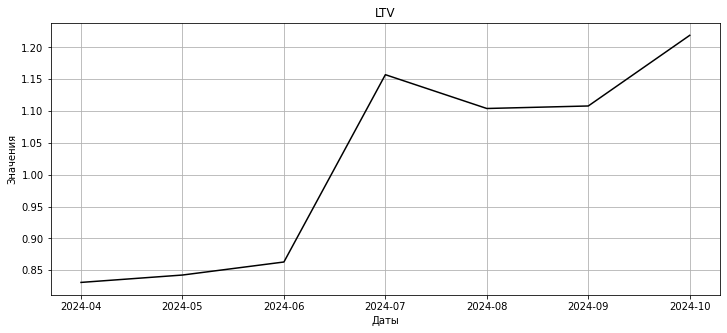

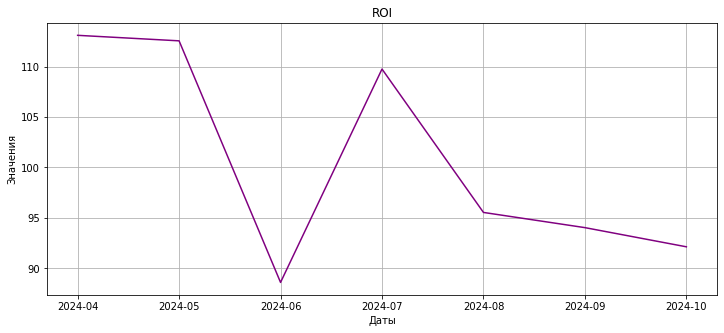

,month,mean_cac,user_id,revenue,ltv,roi
0,2024-04,0.734706,9069,7535.30,0.830885,113.090812
1,2024-05,0.748572,9789,8246.98,0.842474,112.544115
2,2024-06,0.973978,8719,7524.10,0.862954,88.600994
3,2024-07,1.054344,8742,10115.59,1.157125,109.748332
4,2024-08,1.155601,9518,10508.12,1.104026,95.536930
5,2024-09,1.178301,9198,10191.07,1.107966,94.030782
6,2024-10,1.323047,9520,11604.24,1.218933,92.130755


In [26]:
# Подгатавливаем данные к вычислению среднего CAC по месяцам

orders_full_new_28 = orders_full_new[orders_full_new['lifetime'] <= 28].copy()
month_revenue = orders_full_new_28.groupby('month')['revenue'].sum().reset_index()

table = pd.merge(
    month_cac[['month', 'mean_cac', 'user_id']],
    month_revenue[['month', 'revenue']],
    on='month',
    how='left'
)

# Рассчитываем значение LTV

table['ltv'] = table['revenue']/table['user_id']

# Рассчитываем значение ROI

table['roi'] = (table['ltv']/table['mean_cac'])*100.0

# Строим графики в matplotlib

plt.subplots(figsize=(12,5))
plt.plot(table['month'].astype(str), table['ltv'], color='black')
plt.title('LTV')
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.grid()
plt.show()

plt.subplots(figsize=(12,5))
plt.plot(table['month'].astype(str), table['roi'], color='purple')
plt.title('ROI')
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.grid()
plt.show()

table

На основе полученных графиков мы видим:
    
- С апреля 2024 по октябрь 2024 наблюдается тренд на увеличение показателя LTV (с 0.83 до 1.21). Повышение данного показателя свидетельствует о том, что компания получает с одного пользователя больше прибыли по сравнению с предыдущими периодами

- С апреля 2024 по октябрь 2024 наблюдается тренд на снижение показателя ROI (со 113% до 92%). Снижение данного показателя свидетельстует о том, что с каждым месяцем продукт окупается в меньшей степени по сравнению с предыдущими периодами из-за роста средней стоииости привлечения клиента CAC

Таким образом, после выполнения обеих задач мы можем сделать следующие выводы:
    
- Показатель количества активных пользователей в день (`DAU`) на протяжении всего периода наблюдения имеет тренд на увеличение. 
- Показатель количества активных пользователей в месяц (`MAU`) на протяжении всего периода наблюдения имеет тренд на увеличение
- Показатель доли месячной аудитории, которая активно пользуется продуктом ежедневно, (`Stickiness`) на протяжении всего периода наблюдения имеет тренд на увеличение

Увеличение каждого из этих показателей свидетельствует об увеличение аудитории, готовой взаимодействовать с продуктом на постоянной основе

- Показатель средней стоимости привлечения пользователя (`CAC`), начиная с июня 2024, имеет тренд на увеличение. Это свидетельствует об увеличении затрат на привлечение пользователей, что в свою очередь сказалось на снижении показателя окупаемости инвестиций (`ROI`)
- Показатель прибыли с одного клиента (`LTV`) с апреля 2024 по октябрь 2024 имеет тренд на увеличение. Это свидетельстует о том, что компания на протяжении полугода увеличивала прибыль с одного клиента
- Показатель окупаемости инвестиций (`ROI`) на протяжении всего периода наблюдения имеет тренд на снижение. Это свидетельствует о том, что компания с каждым месяцем окупает свои инвестиции в меньшей степени из-за снижения общего объёма выручки и увеличении средней стоимости привлечения пользователя

## Анализ метрик в разрезе источника привлечения

Перед нами стоят следующие задачи: 

**Задача 1**. Определить самые популярные источники привлечения:
- Посчитать общее число привлечённых пользователей для каждого источника.
- Визуализировать динамику набора новых пользователей по дням в каждом источнике.
- Рассчитать и визуализировать динамику DAU, MAU и Stickiness по источникам привлечения.

**Задача 2**. Изучить динамику изменения метрик на 28-й день в разрезе источника. Провести анализ с выделением недельных когорт по дате привлечения. Рассчитать и визуализировать:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.
- Недельная динамика затрат на маркетинг по каждому источнику привлечения.
- Динамика среднего CAC, значений LTV и ROI.

Для выполнения задачи 1 посчитаем общее число привлечённых пользователей для каждого источника

In [27]:
# Рассчитываем общее число привлечённых пользователей для каждого источника

channel_users = visits_full['channel'].value_counts()
print(channel_users)
print()
prop_channel_users = visits_full['channel'].value_counts()/visits_full['channel'].count()
print(prop_channel_users)

TipTop            59439
FaceBoom          36308
RocketSuperAds    36081
MediaTornado      30037
Name: channel, dtype: int64

TipTop            0.367213
FaceBoom          0.224310
RocketSuperAds    0.222908
MediaTornado      0.185568
Name: channel, dtype: float64


На основе табличных значений мы можем увидеть, что наиболее популярным источником привлечения является платформа `Tiptop` (36% от общего количества привлечённых пользователей). Менее популярными являются `Faceboom` и `RocketSuperAds` (по 22% от общего количества привлечённых пользователей). Наименее популярным является `MediaTornado` (18% от общего количества привлечённых пользователей)

Далее визуализируем динамику набора новых пользователей по дням в каждом источнике

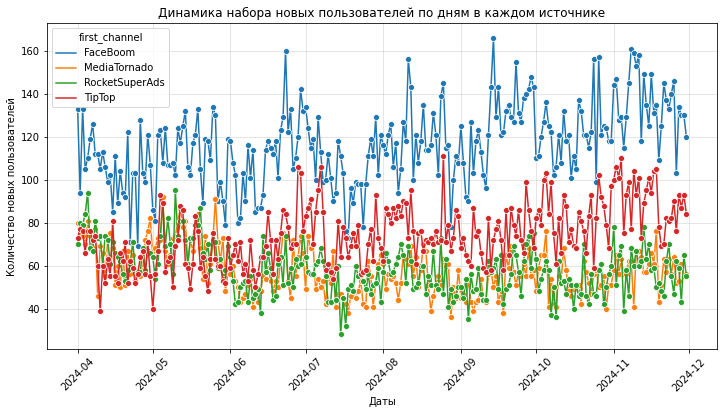

In [28]:
# Рассчитаем динамику набора новых пользователей по дням в каждом источнике

channel_grouped = visits_full.groupby(['first_dt', 'first_channel'])['user_id'].nunique().reset_index()
channel_grouped

# Строим графики

plt.figure(figsize=(12, 6))

sns.lineplot(
    data = channel_grouped,
    x = 'first_dt',
    y = 'user_id',
    hue='first_channel',
    ci=False,
    marker='o',
)

plt.grid(alpha=.4)
plt.xticks(rotation=45)

plt.xlabel('Даты')
plt.ylabel('Количество новых пользователей')

plt.title(f'Динамика набора новых пользователей по дням в каждом источнике')
plt.show()

На основе построенного графика мы видим, что каждый из источников привлечения пользователей имеет стабильных характер изменений - наблюдаются как резкие притоки аудитории, так и её резкие оттоки

Далее рассчитаем и визуализируем динамику `DAU`, `MAU` и `Stickiness` по источникам привлечения. Начнём с `DAU` по источникам привлечения

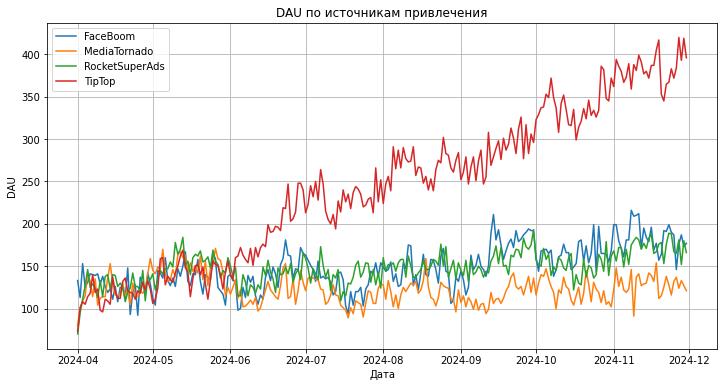

In [29]:
visits_full['session_start'] = pd.to_datetime(visits_full['session_start'])

# Расчитываем DAU по источникам привлечения

dau_channel = visits_full.groupby(['session_start', 'first_channel'])['user_id'].nunique().reset_index()
dau_channel = dau_channel.rename(columns={'user_id': 'dau'})

# Визуализируем DAU по источникам привлечения

plt.figure(figsize=(12, 6))
for channel in dau_channel['first_channel'].unique():
    channel_data = dau_channel[dau_channel['first_channel'] == channel]
    plt.plot(channel_data['session_start'], channel_data['dau'], label=channel)
plt.title('DAU по источникам привлечения')
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.legend()
plt.grid(True)

На основе полученного графика мы видим, что количество уникальных пользователей в день существенно увеличивается только для источника привлечения `TipTop`. Остальные каналы привлечения имеют относительный стабильный характер изменений в количестве уникальных пользователей в день. Далее рассмотрим `MAU` по источникам привлечения

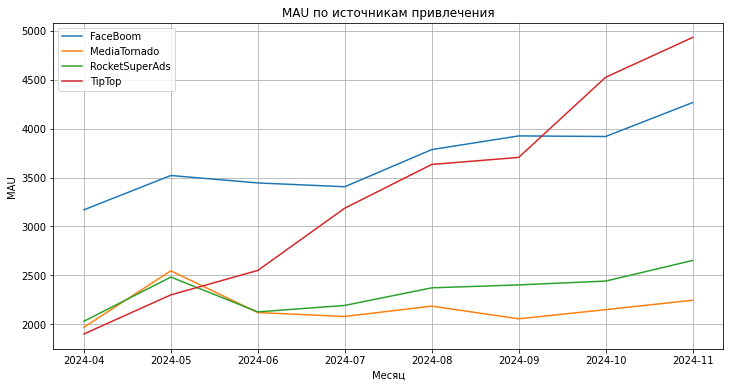

In [30]:
visits_full['month'] = visits_full['session_start'].dt.to_period('M')

# Расчитываем MAU по источникам привлечения

mau_channel = visits_full.groupby(['month', 'first_channel'])['user_id'].nunique().reset_index()
mau_channel = mau_channel.rename(columns={'user_id': 'mau'})

# Визуализируем MAU по источникам привлечения

plt.figure(figsize=(12, 6))
for channel in mau_channel['first_channel'].unique():
    channel_data = mau_channel[mau_channel['first_channel'] == channel]
    plt.plot(channel_data['month'].astype(str), channel_data['mau'], label=channel)
plt.title('MAU по источникам привлечения')
plt.xlabel('Месяц')
plt.ylabel('MAU')
plt.legend()
plt.grid(True)

На основе полученного графика мы видим, что количество уникальных пользователей в день существенно увеличивается для двух источников привлечения - `TipTop` и `FaceBoom`. Однако для каналов привлечения `RocketSuperAds` и `MediaTornado` наблюдается снижение количества уникальных пользователей к июню 2024. После июня 2024 у канала `RocketSuperAds` наблюдается плавное увеличение количества активных пользователей, а у канала `MediaTornado` наблюдается определённая стагнация. Далее рассмотрим `Stickiness` по источникам привлечения

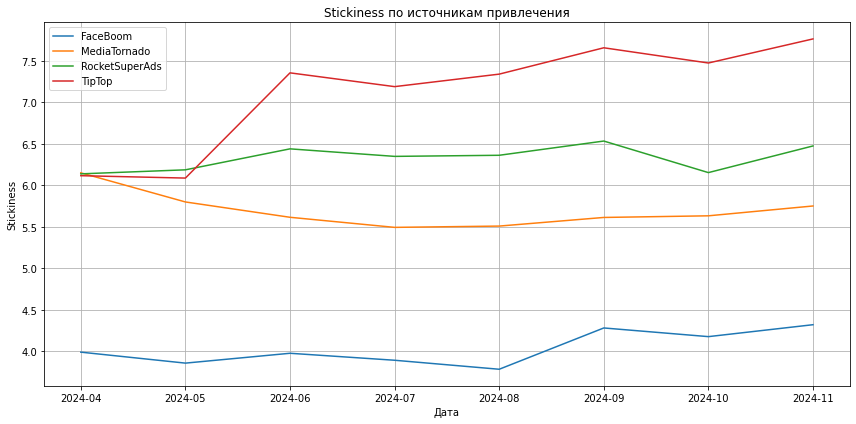

,month,first_channel,dau,mau,stickiness
0,2024-04,FaceBoom,126.433333,3170,3.988433
1,2024-04,MediaTornado,121.100000,1969,6.150330
2,2024-04,RocketSuperAds,124.600000,2030,6.137931
3,2024-04,TipTop,116.200000,1900,6.115789
4,2024-05,FaceBoom,135.774194,3521,3.856126
5,2024-05,MediaTornado,147.645161,2546,5.799103
6,2024-05,RocketSuperAds,153.548387,2482,6.186478
7,2024-05,TipTop,140.000000,2300,6.086957
8,2024-06,FaceBoom,136.933333,3445,3.974843
9,2024-06,MediaTornado,118.966667,2119,5.614283


In [31]:
# Рассчитываем Stickiness по источникам привлечения

stickiness_table_channel = dau_channel.copy()
stickiness_table_channel['month'] = pd.to_datetime(stickiness_table_channel['session_start']).dt.to_period('M')

stickiness_table_channel = stickiness_table_channel.groupby(['month', 'first_channel'])['dau'].mean().reset_index()
stickiness_table_channel['month'] = stickiness_table_channel['month'].dt.to_timestamp().dt.to_period('M')

stickiness_table_channel_new = pd.merge(stickiness_table_channel, mau_channel, on=['month', 'first_channel'], how='left')
stickiness_table_channel_new['stickiness'] = (stickiness_table_channel_new['dau'] / stickiness_table_channel_new['mau'])*100.0

# Визуализируем Stickiness по источникам привлечения

plt.figure(figsize=(12, 6))
for channel in stickiness_table_channel_new['first_channel'].unique():
    channel_data = stickiness_table_channel_new[stickiness_table_channel_new['first_channel'] == channel]
    plt.plot(channel_data['month'].astype(str), channel_data['stickiness'], label=channel)
plt.title('Stickiness по источникам привлечения')
plt.xlabel('Дата')
plt.ylabel('Stickiness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

stickiness_table_channel_new

На основе данного графика мы видим, что показатель доли месячной аудитории, которая активно пользуется продуктом ежедневно, заметно увеличивается только для источника привлечения `TipTop`. Для источников привлечения `RocketSuperAds` и `MediaTornado` наблюдается относительно стабильный характер изменений (показатель на уровне 6% и 4% соответственно). Для источника привлечения `FaceBoom` наблюдается снижение данного показателя на 0.5%

Для выполнения задачи 2 необходимо изучить динамику изменения метрик на 28-й день в разрезе источника. Требуется провести анализ с выделением недельных когорт по дате привлечения.

Для этого мы рассчитаем и визуализируем:

- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.
- Недельную динамику затрат на маркетинг по каждому источнику привлечения.
- Динамику среднего CAC, значений LTV и ROI.
 
Начнём с показателя скользящего удержания на 14-й день с момента привлечения (за период с 14-го по 28-й день)

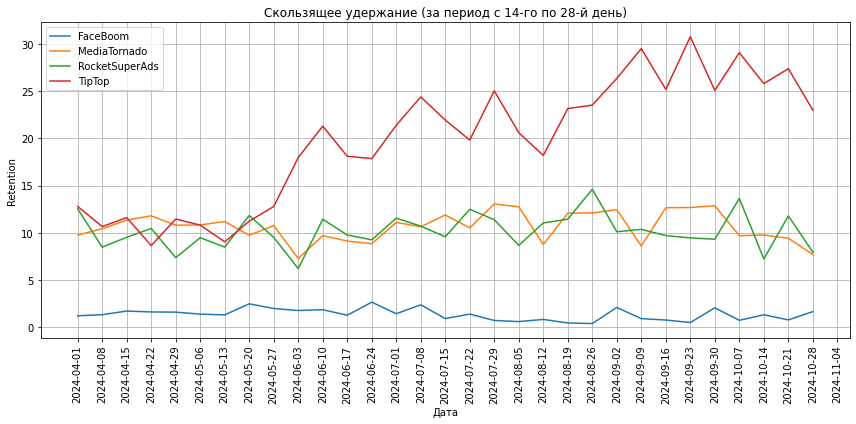

In [32]:
# Подгатавливаем данные к вычислению метрик

visits_full['first_dt'] = pd.to_datetime(visits_full['first_dt'])

orders_full['week'] = orders_full['first_dt'].dt.to_period('W').dt.start_time
profiles['week'] = profiles['first_dt'].dt.to_period('W').dt.start_time
visits_full['week'] = visits_full['first_dt'].dt.to_period('W').dt.start_time

orders_full_28 = orders_full[orders_full['lifetime'] <= 28].copy()
last_date = visits_full['first_dt'].max() - pd.Timedelta(days=28)
needed_cohorts = visits_full[visits_full['first_dt'] <= last_date]

# Рассчитываем скользящее удержание (за период с 14-го по 28-й день)

retention = needed_cohorts[(needed_cohorts['lifetime'] >= 14) & (needed_cohorts['lifetime'] <= 28)]
retention_grouped = (retention.groupby(['week', 'first_channel'])['user_id'].nunique() / profiles.groupby(['week', 'first_channel'])['user_id'].nunique())*100
retention_grouped = retention_grouped.reset_index()
retention_grouped = retention_grouped.rename(columns={'user_id': 'retention_14_28'})

# Визуализируем скользящее удержание (за период с 14-го по 28-й день)

plt.figure(figsize=(12, 6))
for channel in retention_grouped['first_channel'].unique():
    channel_data = retention_grouped[retention_grouped['first_channel'] == channel]
    plt.plot(channel_data['week'].astype(str), channel_data['retention_14_28'], label=channel)
plt.title('Cкользящее удержание (за период с 14-го по 28-й день)')
plt.xlabel('Дата')
plt.ylabel('Retention')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

На основе данного графика мы видим, что за период с 14-го по 28-й день показатель скользящего удержания существенного растёт только у одного источника привлечения - `TipTop` (с 10 до 25-30%). Для остальных источников привлечения наблюдается относительное стабильное изменение метрики. Для источников привлечения `MediaTornado` и `RocketSuperAds` метрика держится на уровне 10%, а для источника привлечения `Faceboom` - менее 5%. Далее рассчитае показатель конверсии в покупку

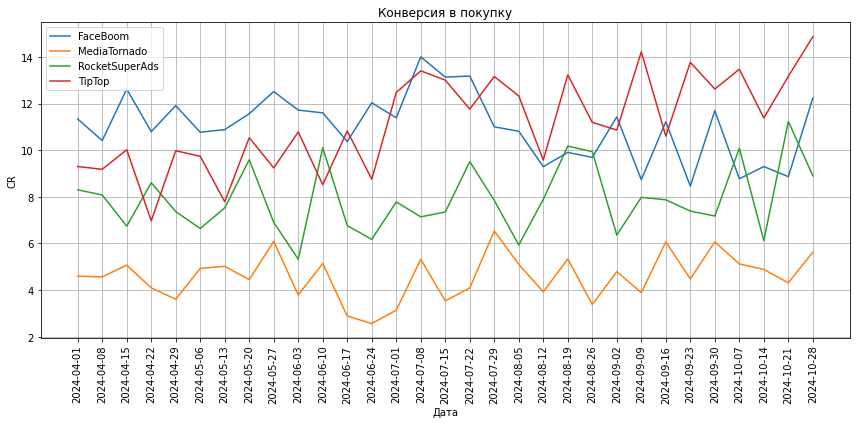

In [33]:
# Рассчитываем конверсию в покупку

needed_profiles = profiles[profiles['first_dt'] <= last_date]
conversion_grouped = (orders_full_28[orders_full_28['week'] <= last_date].groupby(['week', 'first_channel'])['user_id'].nunique() / needed_profiles.groupby(['week', 'first_channel'])['user_id'].nunique())*100
conversion_grouped = conversion_grouped.reset_index()
conversion_grouped = conversion_grouped.rename(columns={'user_id': 'conversion_rate'})

# Визуализируем конверсию в покупку

plt.figure(figsize=(12, 6))
for channel in conversion_grouped['first_channel'].unique():
    channel_data = conversion_grouped[conversion_grouped['first_channel'] == channel]
    plt.plot(channel_data['week'].astype(str), channel_data['conversion_rate'], label=channel)
plt.title('Конверсия в покупку')
plt.xlabel('Дата')
plt.ylabel('CR')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

На основе данного графика мы можем увидеть волнообразный характер изменения метрики конверсии в покупку. `Faceboom` - от 9 до 14%, `TipTop` - от 7 до 15%, `RocketSuperAds` - от 6 до 11%, `MediaTornado` - от 3 до 6%. Далее рассмотрим недельную динамику затрат на маркетинг по каждому источнику привлечения 

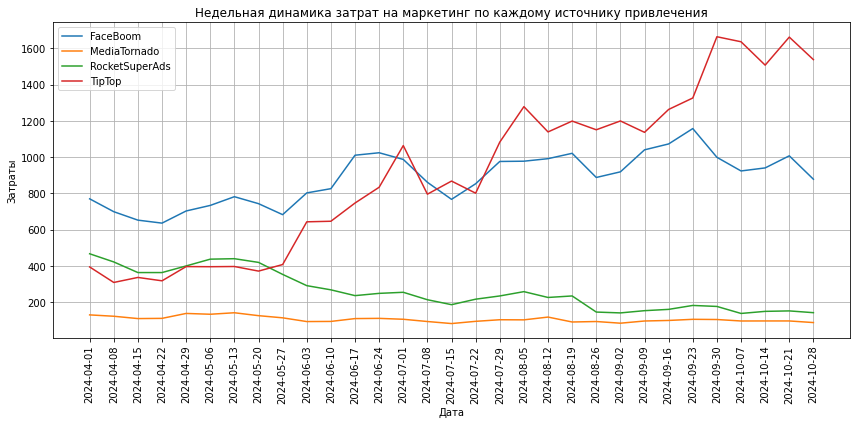

In [34]:
# Подготавливаем данные к расчёты недельной динамики затрат на маркетинг по каждому источнику привлечения

costs['dt'] = pd.to_datetime(costs['dt'])
table1 = pd.merge(retention_grouped, conversion_grouped, on=['week', 'first_channel'])

# Рассчитываем недельную динамику затрат на маркетинг по каждому источнику привлечения

week_costs = costs[costs['dt'] <= last_date].groupby([costs['dt'].dt.to_period('W').dt.start_time, 'channel'])['costs'].sum().reset_index()

# Визуализируем недельную динамику затрат на маркетинг по каждому источнику привлечения

plt.figure(figsize=(12, 6))
for channel in week_costs['channel'].unique():
    channel_data = week_costs[week_costs['channel'] == channel]
    plt.plot(channel_data['dt'].astype(str), channel_data['costs'], label=channel)
plt.title('Недельная динамика затрат на маркетинг по каждому источнику привлечения')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

На основе данного графика мы видим, что для канала привлечения `TipTop` существенно выросли затраты - на 1200. В меньшей степени затраты выросли для источника привлечения `FaceBoom` - на 100-200. Для канала привлечения `RocketSuperAds` затраты снизились - на 300. Для канала привлечения `MediaTornado` затраты остались неизменны. Перейдём к рассмотрению динамики среднего CAC, значений LTV и ROI 

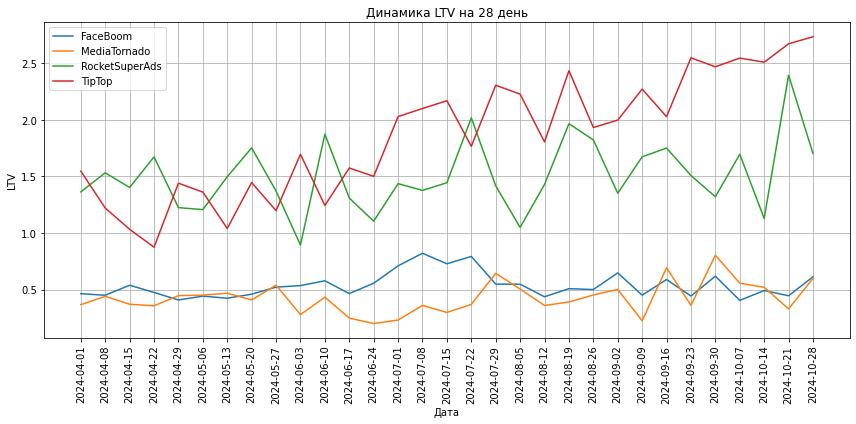

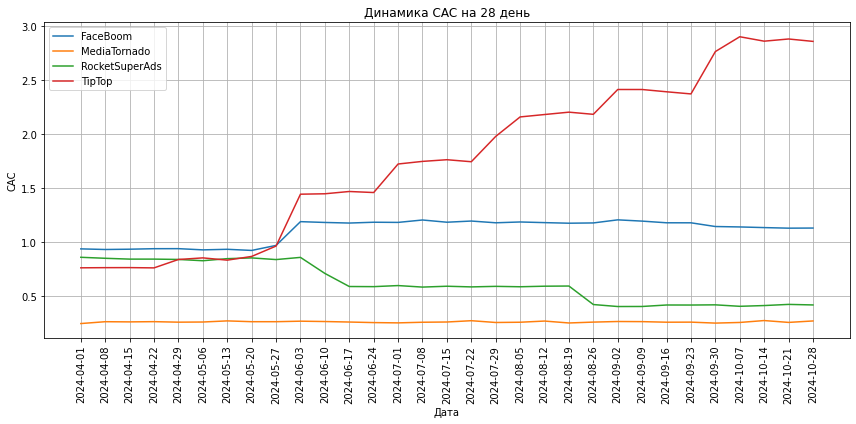

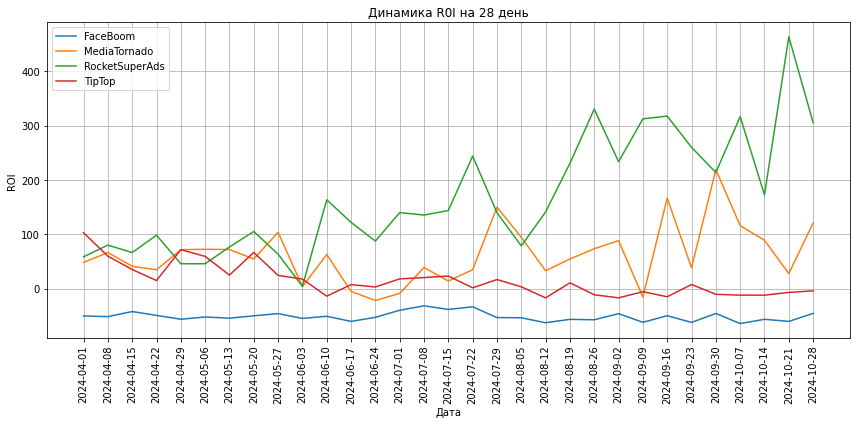

In [35]:
# Рассчитываем динамику среднего CAC, значений LTV и ROI

ltv_28 = orders_full_28[orders_full_28['week'] <= last_date].groupby(['week', 'first_channel'])['revenue'].sum()/needed_profiles.groupby(['week', 'first_channel'])['user_id'].nunique()
ltv_28 = ltv_28.reset_index(name = 'ltv_28')

cac_28 = needed_profiles.groupby(['week', 'first_channel'])['cac'].mean().reset_index()
cac_28 = cac_28.rename(columns={'cac': 'cac_28'})

df_roi = pd.merge(ltv_28, cac_28, on=['week', 'first_channel'])
df_roi['roi_28'] = ((df_roi['ltv_28'] - df_roi['cac_28']) / df_roi['cac_28'])*100

# Визуализируем динамику среднего CAC, значений LTV и ROI

plt.figure(figsize=(12, 6))
for channel in ltv_28['first_channel'].unique():
    channel_data = ltv_28[ltv_28['first_channel'] == channel]
    plt.plot(channel_data['week'].astype(str), channel_data['ltv_28'], label=channel)
plt.title('Динамика LTV на 28 день')
plt.xlabel('Дата')
plt.ylabel('LTV')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for channel in cac_28['first_channel'].unique():
    channel_data = cac_28[cac_28['first_channel'] == channel]
    plt.plot(channel_data['week'].astype(str), channel_data['cac_28'], label=channel)
plt.title('Динамика CAC на 28 день')
plt.xlabel('Дата')
plt.ylabel('CAC')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for channel in df_roi['first_channel'].unique():
    channel_data = df_roi[df_roi['first_channel'] == channel]
    plt.plot(channel_data['week'].astype(str), channel_data['roi_28'], label=channel)
plt.title('Динамика R0I на 28 день')
plt.xlabel('Дата')
plt.ylabel('ROI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

На основе данных графиков мы можем сделать следующие выводы:
    
- Для источника привлечения `TipTop` произошло:
    - Увеличение LTV
    - Увеличение CAC
    - Снижение ROI
- Для источника привлечения `FaceBoom` произошло:
    - LTV - на прежнем уровне
    - Увеличение CAC
    - ROI - на прежнем уровне
- Для источника привлечения `RocketSuperAds` произошло:
    - Увеличение LTV
    - Снижение CAC
    - Увеличение ROI
- Для источника привлечения `MediaTornado` произошло:
    - LTV - на прежнем уровне
    - CAC - на прежнем уровне
    - Увеличение ROI

Исходя из произведённых вычислений и построенных графиков мы можем сформулировать промежуточные выводы о динамике изменения метрик на 28-й день в разрезе источника привлечения (с выделением недельных когорт по дате привлечения:
    
- Источники привлечения `FaceBoom` и `TipTop` - не окупаются (затраты превышают доход с одного клиента)
- Источники привлечения `RocketSuperAds` и `MediaTornado` - окупаются (доход с одного клиента превышает затраты)
- Наибольшее LTV - у канала привлечения `TipTop`
- Наименьшее LTV - У канала привлечения `MediaTornado`(необходимо обратить внимание)
- Наибольший CAC - у канала привелечения `TipTop` (необходимо обратить внимание)
- Наименьший CAC - у канала привелечения `MediaTornado`
- Наибольший ROI - у канала привелечения `RocketSuperAds`
- Наименьший ROI - у канала привелечения `FaceBoom` (необходимо обратить внимание)

## Анализ периода окупаемости маркетинговых вложений

В данном пункте нам необходимо изучить источники привлечения, которые к 28-му дню не выходят на уровень окупаемости, то есть - `FaceBoom` и `TipTop`. Для них мы рассчитаем и визуализируем в виде тепловой карты значения ROI за больший период. Возьмём временной период в 8–10 недель

Предварительно разделим данные на недельные когорты по дате привлечения, а в качестве интервала наблюдений будем использовать недели

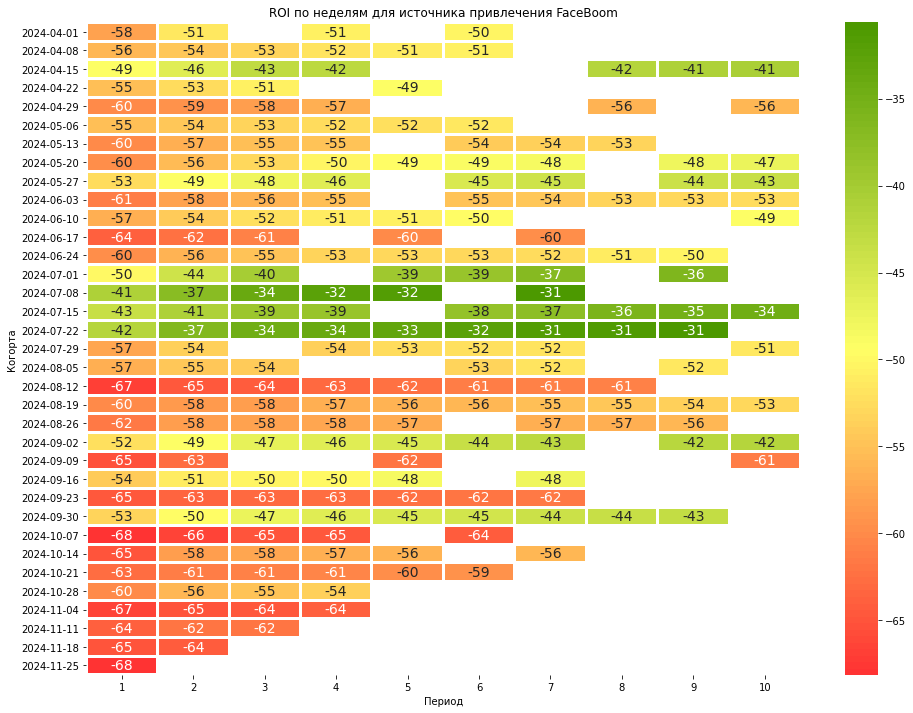

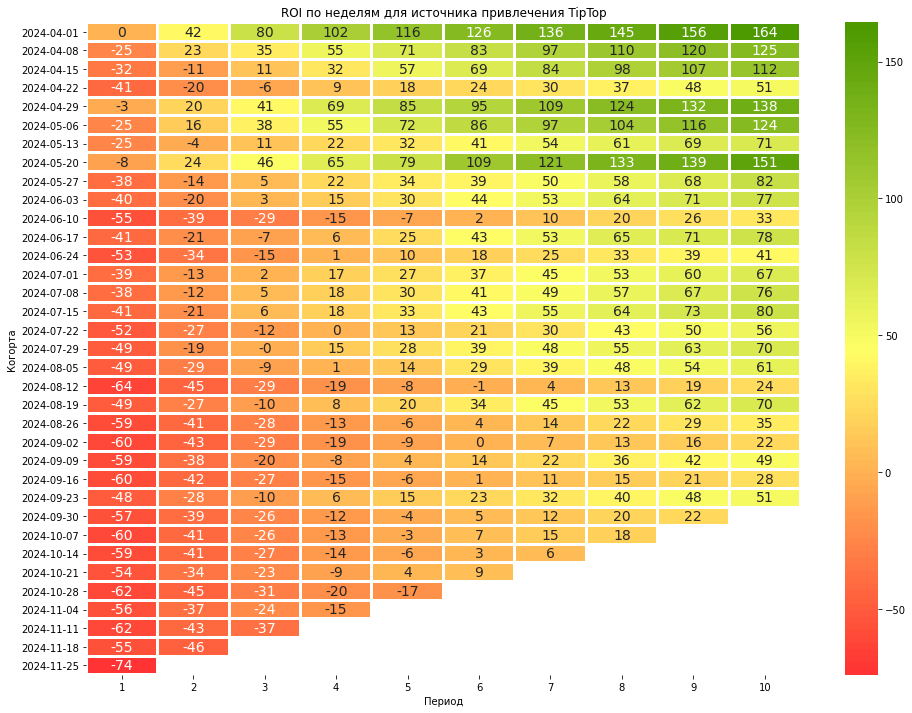

In [36]:
# Подготавливаем данные для расчёта ROI за 8-10 недель

df_channels = orders_full[(orders_full['first_channel'] == 'FaceBoom') | (orders_full['first_channel'] == 'TipTop')].copy()

df_channels['week'] = df_channels['first_dt'].dt.to_period('W').dt.start_time
df_channels['number_week'] = (df_channels['lifetime'] // 7) + 1
df_channels = df_channels[df_channels['number_week'] <= 10]

cumulative_revenue = df_channels.groupby(['week', 'first_channel', 'number_week'])['revenue'].sum()
cumulative_revenue = cumulative_revenue.groupby(level=[0,1]).cumsum().reset_index()
cumulative_revenue = cumulative_revenue.rename(columns={'revenue': 'cumulative_revenue'})

df_cac = profiles[(profiles['first_channel'] == 'FaceBoom') | (profiles['first_channel'] == 'TipTop')].groupby(['week', 'first_channel'])['cac'].sum().reset_index()
df_roi = pd.merge(cumulative_revenue, df_cac, on=['week', 'first_channel'])

# Рассчитываем ROI за 8-10 недель

df_roi['roi'] = ((df_roi['cumulative_revenue'] - df_roi['cac']) / df_roi['cac'])*100

# Визуализируем ROI за 8-10 недель по источникам привлечения FaceBoom и TipTop

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
df_roi_pivot_table_faceboom = df_roi[df_roi['first_channel'] == 'FaceBoom'].pivot_table(index = 'week', columns = 'number_week', values = 'roi', aggfunc = 'mean')
df_roi_pivot_table_tiptop = df_roi[df_roi['first_channel'] == 'TipTop'].pivot_table(index = 'week', columns = 'number_week', values = 'roi', aggfunc = 'mean')

df_roi_pivot_table_faceboom.index = df_roi_pivot_table_faceboom.index.strftime('%Y-%m-%d')
df_roi_pivot_table_tiptop.index = df_roi_pivot_table_tiptop.index.strftime('%Y-%m-%d')

plt.figure(figsize=(16, 12))
sns.heatmap(df_roi_pivot_table_faceboom,
          cmap=cmap,
          annot=True,
          fmt='.0f',
          linewidths=2,
          annot_kws={"size": 14})
plt.title('ROI по неделям для источника привлечения FaceBoom')
plt.xlabel('Период')
plt.ylabel('Когорта')
plt.show()

plt.figure(figsize=(16, 12))
sns.heatmap(df_roi_pivot_table_tiptop,
          cmap=cmap,
          annot=True,
          fmt='.0f',
          linewidths=2,
          annot_kws={"size": 14})
plt.title('ROI по неделям для источника привлечения TipTop')
plt.xlabel('Период')
plt.ylabel('Когорта')
plt.show()

На основе данных тепловых карт мы можем сделать следующие выводы:

- Источник привлечения FaceBoom не окупается за 10 недель (до и после нововведений)
- Источник привлечения TipTop минимально окупается со 2-ой недели (преимущественно - до нововведений), максимально - с 7-ой недели (преимущественно - после нововведений)

Исходя из произведённых вычислений и построенных тепловых карт мы можем подвести промежуточные выводы:
    
- Источник привлечения `FaceBoom` требует значительных изменений, поскольку LTV - не увеличивается, а CAC - увеличивается, что непосредственно влияет на отсутствие окупаемости данного источника привлечения
- Источник привлечения `TipTop` требует изменений в области затрат, поскольку данный источник привлечения обладает наибольшим показателем CAC, из-за чего период окупаемости увеличивается и компания не может окупать инвестиции в быстром темпе. Стагнация выручки может перерасти в убытки, которые могут в значительной степени снизить прибыль компании

## Выводы и рекомендации

Спортивный контент позволил компании нарастить аудиторию и привлечь заинтересованных потребителей контента с помощью различных источников привлечения:

- Положительным образом себя проявили источники привлечения `RocketSuperAds` и `MediaTornado`. Несмотря на низкое значение дохода на одного клиента, именно эти источники привлечения взимают наименьшее количество затрат и приносят компании больше прибыли из-за высокого показателя окупаемости и низкого показателя срока окупаемости

- При этом в отношении источников привлечения `RocketSuperAds` и `MediaTornado` важно уделить внимание показателю дохода на одного клиента - он составляет меньше 1, что замедляет темпы развития компании и не позволяет организации выйти на новый уровень прибыльности

Однако стоит обратить внимание на то, что вложенные в маркетинговые кампании средства не в полной мере окупают себя в каждом из источников привлечения аудитории:

- В первую очередь, стоит обратить внимание на источник привлечения `Faceboom`, который не окупается спустя 10 недель, что непосредственно влияет на стагнацию выручки, а в будущем может привести к её снижению

- Также стоит обратить внимание на источник привлечения `TipTop`, а именно - на расходную часть. Несмотря на то, что данный источник привлечения обладает наивысшим показателем дохода на одного клиента, важно учитывать, что он потребляет наибольшую часть расходов по сравнению с остальными источниками привлечения, что несомненно влияет на стагнацию выручки (хоть и окупается за 2-7 недель)